<a href="https://colab.research.google.com/github/Chanaka3534/FYP_LSTM/blob/2.0(YES%2FNO)/FYP(LSTM)2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1005 - val_loss: 0.0278
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0225 - val_loss: 0.0183
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0179 - val_loss: 0.0144
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - val_loss: 0.0094
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - val_loss: 0.0091
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0100 - val_loss: 0.0107
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

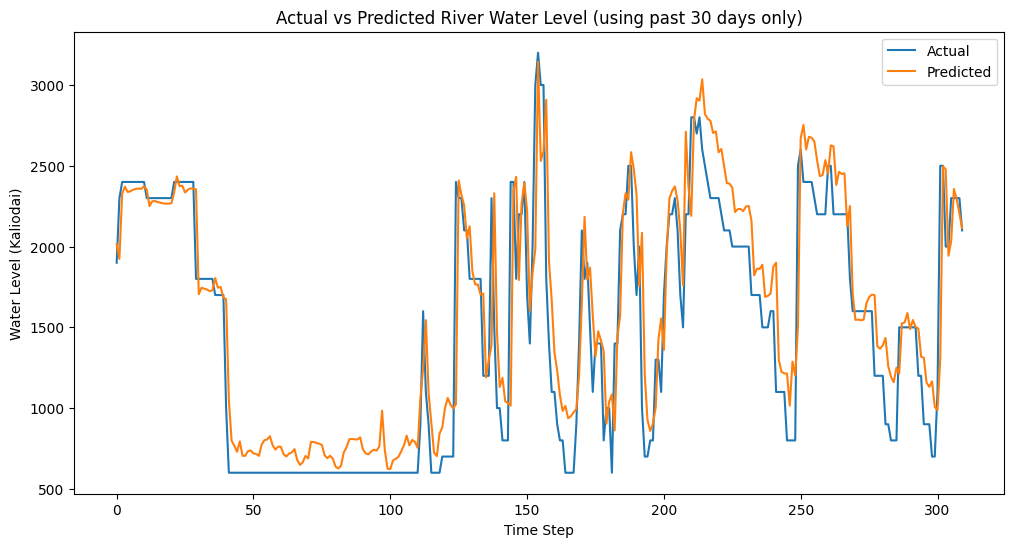

Mean Squared Error (MSE): 99591.12
Root Mean Squared Error (RMSE): 315.58
Mean Absolute Error (MAE): 227.42
R² Score: 0.8133
MAE % of mean: 15.38%
RMSE % of mean: 21.35%


In [2]:
# 📦 1) Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 🗂️ 2) Load dataset
df = pd.read_csv('FYP_DATA _YESNO.csv')

# ➡️ 3) Convert columns
df['Resovior water level(m)'] = pd.to_numeric(df['Resovior water level(m)'], errors='coerce')
df['Resovior discharge rate'] = pd.to_numeric(df['Resovior discharge rate'], errors='coerce')
df['Water level(Kaliodai)'] = pd.to_numeric(df['Water level(Kaliodai)'], errors='coerce')

df = df.dropna()

# ✅ 4) Use only required columns: NO Prev_Water_Level
features = df[['Catchment Rainfall',
               'Downstream rainfall',
               'Resovior water level(m)',
               'Resovior discharge rate',
               'Water level(Kaliodai)']]

target = df['Water level(Kaliodai)'].values.reshape(-1, 1)  # Still predicting same

# 🔄 5) Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target)

# 📏 6) Create sequences
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])    # past 30 days
        ys.append(y[i+time_steps])      # today's level (next day)
    return np.array(Xs), np.array(ys)

TIME_STEPS = 30
X_seq, y_seq = create_sequences(X_scaled, y_scaled, TIME_STEPS)

# 📊 7) Train-test split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# 🧠 8) LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_seq.shape[2])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
model.summary()

# 🚀 9) Train
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=1)

# ✅ 10) Predict & inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# 📈 11) Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted River Water Level (using past 30 days only)')
plt.xlabel('Time Step')
plt.ylabel('Water Level (Kaliodai)')
plt.legend()
plt.show()

# 🏅 12) Evaluate
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

mean_y = np.mean(y_test_actual)
mae_percent = (mae / mean_y) * 100
rmse_percent = (rmse / mean_y) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE % of mean: {mae_percent:.2f}%")
print(f"RMSE % of mean: {rmse_percent:.2f}%")

In [3]:
# -------------------------------
# ✅ 1) Create actual risk labels aligned with your sequence
flood_risk_seq = df['Flood risk'].values[TIME_STEPS:]
split = int(0.8 * len(X_seq))
flood_risk_test = flood_risk_seq[split:]

# ✅ 2) Predict as usual
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# ✅ 3) Convert predicted water level to risk
def get_flood_risk(level):
    if level < 2800:
        return 'NO'
    else:
        return 'YES'

y_pred_classes = [get_flood_risk(v[0]) for v in y_pred]

# ✅ 4) Compare predicted vs actual flood risk from file
from sklearn.metrics import classification_report

print("\n📊 Flood Risk Classification Report:\n")
print(classification_report(flood_risk_test, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

📊 Flood Risk Classification Report:

              precision    recall  f1-score   support

          NO       0.99      0.98      0.99       306
         YES       0.17      0.25      0.20         4

    accuracy                           0.97       310
   macro avg       0.58      0.62      0.59       310
weighted avg       0.98      0.97      0.98       310



In [4]:
import numpy as np

manual_input = np.array([
    [3.8, 0, 83.6, 1200, 2400],
    [2.7, 0, 83.5, 1350, 2300],
    [9.0, 0, 83.8, 1150, 2300],
    [1.7, 0, 83.1, 850, 2100],
    [2.9, 4.3, 82.9, 1050, 2100],
    [3.3, 17.8, 82.8, 1050, 1800],
    [11.9, 0, 82.7, 1050, 1800],
    [12.9, 0, 82.7, 1000, 1800],
    [15.6, 0, 82.8, 400, 1800],
    [8.4, 0, 82.9, 400, 1800],
    [0, 0, 82.9, 800, 1200],
    [0.5, 0, 82.7, 1650, 1200],
    [14.9, 4.2, 82.5, 1750, 1200],
    [1.3, 0, 83.6, 1350, 2300],
    [1.6, 0, 83.8, 750, 1500],
    [0.9, 0, 83.7, 1650, 1000],
    [10.1, 0, 83.6, 1650, 1000],
    [15.7, 0, 83.8, 1350, 800],
    [8.0, 0, 83.9, 1350, 800],
    [32.1, 0, 83.9, 600, 800],
    [3.4, 0, 84.0, 600, 2400],
    [3.2, 0, 83.9, 1600, 2400],
    [13.2, 0, 83.8, 1200, 1800],
    [24.4, 6.0, 83.8, 1200, 2200],
    [18.6, 56.6, 83.7, 1350, 2200],
    [26.4, 1.2, 83.6, 1000, 2400],
    [15.9, 21.2, 83.8, 800, 1700],
    [1.7, 150.3, 83.8, 400, 1400],
    [35.8, 50.4, 84.2, 1000, 2000],
    [79.0, 224.2, 84.9, 1300, 3000]
])


# -----------------------------------
# ✅ 2) Scale with your trained scaler_X
manual_input_scaled = scaler_X.transform(manual_input)

# LSTM expects shape: (1 sample, 30 time steps, 5 features)
manual_input_scaled = manual_input_scaled.reshape((1, 30, 5))

# -----------------------------------
# ✅ 3) Predict scaled water level
pred_scaled = model.predict(manual_input_scaled)

# Inverse scale to get actual water level
pred_water_level = scaler_y.inverse_transform(pred_scaled)[0][0]

print(f"Predicted Water Level: {pred_water_level:.2f}")

# -----------------------------------
# ✅ 4) Classify flood risk
def get_flood_risk(level):
    if level < 2800:
        return 'NO'
    else:
        return 'YES'

pred_risk = get_flood_risk(pred_water_level)

print(f"Predicted Flood Risk: {pred_risk}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Water Level: 3143.17
Predicted Flood Risk: YES


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
